In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier


In [18]:
df = pd.read_csv('/content/train (1).csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [19]:
df.isnull().mean()*100

,0
Survived,0.00000
Age,19.86532
Fare,0.00000


In [22]:
x = df.drop(columns=['Survived'])
y = df['Survived']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2,random_state=2)

In [23]:
x_train.shape


(712, 2)

In [24]:
x_test.shape

(179, 2)

In [25]:
x_train['age_imp'] = x_train['Age']
x_test['age_imp'] = x_test['Age']

In [26]:
x_train.shape

(712, 3)

In [28]:
x_train['age_imp'][x_train['age_imp'].isnull()] = x_train['Age'].dropna().sample(x_train['Age'].isnull().sum()).values

/tmp/ipython-input-2953229587.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  x_train['age_imp'][x_train['age_imp'].isnull()] = x_train['Age'].dropna().sample(x_train['Age'].isnull().sum()).values


In [31]:
x_test['age_imp'][x_test['age_imp'].isnull()] = x_test['Age'].dropna().sample(x_test['Age'].isnull().sum()).values

/tmp/ipython-input-1581921403.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  x_test['age_imp'][x_test['age_imp'].isnull()] = x_test['Age'].dropna().sample(x_test['Age'].isnull().sum()).values


In [33]:
x_test['Age'].dropna().sample(x_test['Age'].isnull().sum()).values

array([70. , 23. , 22. , 32. , 39. , 17. , 19. , 74. ,  1. , 19. , 31. ,
       10. , 30. , 19. , 34. , 28. , 34. , 44. , 48. , 50. , 19. , 24.5,
       25. , 22. , 33. , 29. , 19. , 17. , 44. ])

<Axes: xlabel='Age', ylabel='Density'>

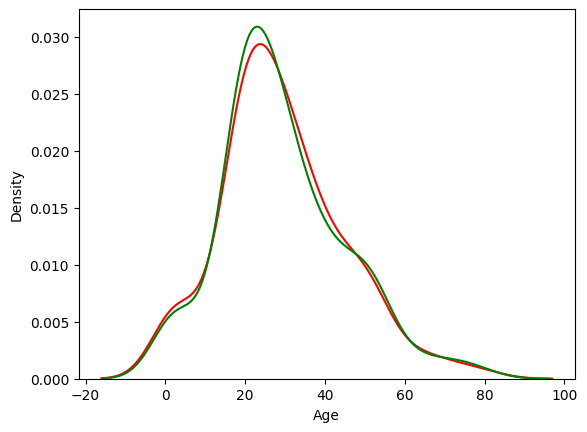

In [36]:
sns.kdeplot(x_test['Age'],color='red')
sns.kdeplot(x_test['age_imp'],color='green')

In [38]:
df = pd.read_csv('/content/house-train.csv', usecols=['GarageQual', 'FireplaceQu', 'SalePrice'])

In [39]:
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [41]:
df.isnull().mean()*100

,0
FireplaceQu,47.260274
GarageQual,5.547945
SalePrice,0.000000


In [42]:
x=df
y=df['SalePrice']

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42, test_size=0.2)

In [44]:
x_train['GarageQual_imp'] = x_train['GarageQual']
x_test['GarageQual_imp'] = x_test['GarageQual']

x_train['FireplaceQu_imp'] = x_train['FireplaceQu']
x_test['FireplaceQu_imp'] = x_test['FireplaceQu']

In [45]:
x_train.head()

,FireplaceQu,GarageQual,SalePrice,GarageQual_imp,FireplaceQu_imp
254,NaN,TA,145000,TA,NaN
1066,TA,TA,178000,TA,TA
638,NaN,NaN,85000,NaN,NaN
799,TA,TA,175000,TA,TA
380,Gd,TA,127000,TA,Gd


In [46]:
x_train['FireplaceQu_imp'][x_train['FireplaceQu_imp'].isnull()] = x_train['FireplaceQu'].dropna().sample(x_train['FireplaceQu'].isnull().sum()).values
x_train['GarageQual_imp'][x_train['GarageQual_imp'].isnull()] = x_train['GarageQual'].dropna().sample(x_train['GarageQual'].isnull().sum()).values

/tmp/ipython-input-2560573714.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  x_train['FireplaceQu_imp'][x_train['FireplaceQu_imp'].isnull()] = x_train['FireplaceQu'].dropna().sample(x_train['FireplaceQu'].isnull().sum()).values
/tmp/ipy

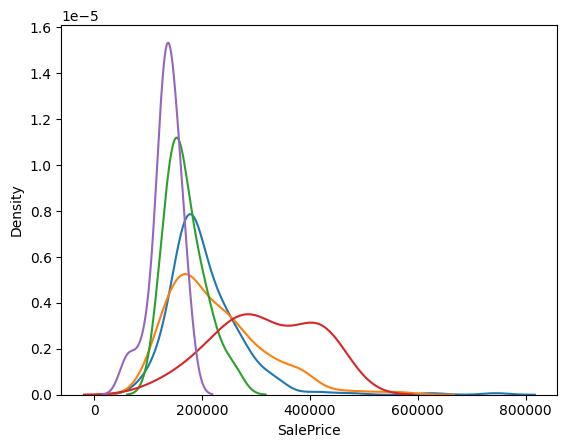

In [48]:
for i in x_train['FireplaceQu'].dropna().unique():
  sns.kdeplot(data=x_train[x_train['FireplaceQu'] == i]['SalePrice'], label=i)

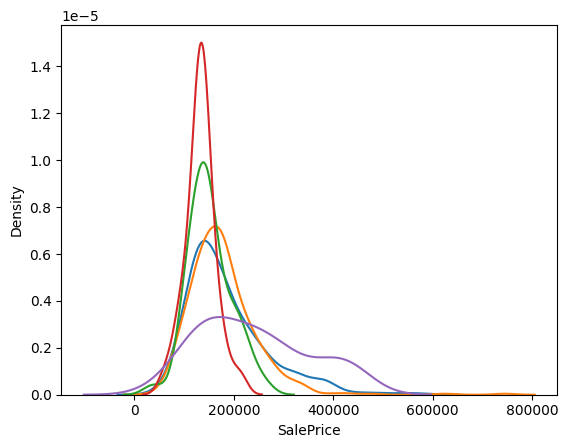

In [50]:
for i in x_train['FireplaceQu_imp'].unique():
  sns.kdeplot(data=x_train[x_train['FireplaceQu_imp'] == i]['SalePrice'], label=i)

# Missing Indicator

In [75]:
df = pd.read_csv('/content/train (1).csv',usecols=['Age','Fare','Survived'])

In [76]:
x = df.drop(columns=['Survived'])
y = df['Survived']

In [77]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=2)

without missing indicator


In [78]:
si = SimpleImputer()
x_train_trf = si.fit_transform(x_train)
x_test_trf = si.transform(x_test)

In [79]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(x_train_trf,y_train)
y_pred = clf.predict(x_test_trf)
accuracy_score(y_test,y_pred)

0.6145251396648045

with missing imdicator

In [85]:
from sklearn.impute import MissingIndicator

In [86]:
mi = MissingIndicator()

In [93]:
mi.features_

array([0])

In [88]:
x_train_missing = mi.fit_transform(x_train)
x_test_missing = mi.transform(x_test)

In [89]:
x_train['missing_age'] = x_train_missing
x_test['missing_age'] = x_test_missing

In [90]:
x_train.head()

,Age,Fare,missing_age
30,40.0,27.7208,False
10,4.0,16.7000,False
873,47.0,9.0000,False
182,9.0,31.3875,False
876,20.0,9.8458,False


In [91]:
x_test.head()

,Age,Fare,missing_age
707,42.0,26.2875,False
37,21.0,8.0500,False
615,24.0,65.0000,False
169,28.0,56.4958,False
68,17.0,7.9250,False


In [92]:
si = SimpleImputer()
x_train_trf2 = si.fit_transform(x_train)
x_test_trf2 = si.transform(x_test)

In [94]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(x_train_trf2,y_train)
y_pred = clf.predict(x_test_trf2)
accuracy_score(y_test,y_pred)

0.6312849162011173

# GridSearchCV

In [95]:
df = pd.read_csv('/content/train (1).csv')

In [97]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [98]:
df.drop(columns=['PassengerId','Name', 'Ticket', 'Cabin'])

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [99]:
x=df.drop(columns=['Survived'])
y=df['Survived']

In [100]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [104]:
numerical_features = ['Age','Fare']
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [105]:
categorical_features = ['Embarked','Sex','Pclass']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy = 'most frequent')),
    ('onehot', OneHotEncoder())
])

In [106]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat',categorical_transformer,categorical_features)
    ])

In [107]:
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression())])

In [108]:
param_grid = {
    'preprocessor__num__imputer__strategy': ['mean', 'median'],
    'preprocessor__cat__imputer__strategy': ['most_frequent', 'constant'],
    'classifier__C': [0.1, 1.0, 10, 100]
}
grid_search = GridSearchCV(clf, param_grid, cv=5)


In [110]:
grid_search.fit(x_train, y_train)

print("Best parameters: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

Best parameters:  {'classifier__C': 0.1, 'preprocessor__cat__imputer__strategy': 'constant', 'preprocessor__num__imputer__strategy': 'mean'}
Best cross-validation score:  0.8061459667093469
